In [1]:
import pandas as pd

**Научимся считать метрики в pandas-табличках**

Представим, что 2 добрых и очень-очень умных гнома прокрались к нам в данные, описывающие различные поездки в такси.
Далее, для каждого объекта (и его признаков, соответственно), гномы построили модели предсказания того, какая должна была быть у данных заказов длительность исполнения. Прогнозы своих моделей они положили соответственно в колонки **prediction_1** и **prediction_2**

In [101]:
df = pd.read_csv('taxi_dataset_with_predictions.csv', index_col=0)

In [102]:
df.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km,prediction_1,prediction_2
id,,,,,,,,
id2875421,1,2016-03-14 17:24:55,930.399753,0,455.0,1.500479,578.156451,355.270710
id2377394,0,2016-06-12 00:43:35,930.399753,0,663.0,1.807119,962.657188,674.295781
id3858529,1,2016-01-19 11:35:24,930.399753,0,2124.0,6.392080,2546.180515,2422.132431
id3504673,1,2016-04-06 19:32:31,930.399753,0,429.0,1.487155,737.926214,795.992362
id2181028,1,2016-03-26 13:30:55,930.399753,0,435.0,1.189925,666.070794,-4.158492


Давайте попробуем оценить, насколько и вправду гномы оказались умными и осведомленными в области построения различных моделей машинного обучения, и найдем, насколько сильно их модели ошибаются на наших данных!

В начале посчитайте **MSE** модели. Для этого нужно посчитать квадратичное отклонение на каждом объекте, а потом просто усредниться! Полезно иметь формулу перед глазами.

$$
MSE = \frac{1}{n} \sum_i^n (a(x_i)-y_i)^2
$$

Положите результаты в переменные *error_1* и *error_2* соответственно.

In [103]:
### Your code is here
error_1 = ((df['prediction_1'] - df['trip_duration'])**2).mean()
error_2 = ((df['prediction_2'] - df['trip_duration'])**2).mean()

In [104]:
###Распечатайте значения MSE для обоих моделей. Используйте эти значения для ответа на задание 4.
print(f"MSE первой модели равно: {int(error_1)}")
print(f"MSE второй модели равно: {int(error_2)}")

MSE первой модели равно: 99994
MSE второй модели равно: 124936


Видно, что у MSE достаточно большой порядок. Как мы и говорили, глазам куда будет приятнее, если мы будем считать **RMSE**:

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_i^n (a(x_i)-y_i)^2}|
$$

In [105]:
### Your code is here
error_1 = error_1**0.5
error_2 = error_2**0.5

In [106]:
###Распечатайте значения RMSE для обоих моделей. Используйте эти значения для ответа на задание 5.

print(f"RMSE первой модели равно: {int(error_1)}")
print(f"RMSE второй модели равно: {int(error_2)}")

RMSE первой модели равно: 316
RMSE второй модели равно: 353


Что можете сказать про модели первого и второго гнома? Чья оказалась лучше с точки зрения **MSE**? Давайте теперь замерим значения средней абсолютной ошибки, то есть **MAE**:

$$
MAE = \frac{1}{n} \sum_i^n |a(x_i)-y_i|
$$

Рассчитайте MAE для обеих моделей.

In [107]:
### Your code is here
absolute_error_1 = abs(df['prediction_1'] - df['trip_duration']).mean()
absolute_error_2 = abs(df['prediction_2'] - df['trip_duration']).mean()

In [108]:
###Распечатайте значения MAE для обоих моделей. Используйте эти значения для ответа на задание 6.
print(f"MAE первой модели равно: {int(absolute_error_1)}")
print(f"MAE второй модели равно: {int(absolute_error_2)}")

MAE первой модели равно: 300
MAE второй модели равно: 281


Если бы Вас попросили выбрать лучшую модель среди предложенных, на какой Вы бы остановились? Если брать за финальную метрику **MAE**, то поменяли бы Вы решение?

Конечно! Мы наблюдаем ту самую ситуацию, когда, имея 2 разные модели с разными предсказаниями, финальный выбор однозначно сделать нельзя, например, сказав *"Первая модель в среднем и в общем лучше второй!"*. **Нет!** Все зависит от формы ошибки, которую мы выбираем. Иными словами, от вида той самой функции, которая наказывает наши модели и замеряет качество их прогнозов.

Ситуация, когда **MAE** и **MSE**, выбирая между 2-х,  указывают на разные модели, знакома нам еще из лекции. 

Такое может происходить, когда в одной из моделей ошибка, в среднем, независимо от порядка чисел, чуть-чуть лучше, чем во второй. Но при этом если первая модель и ошибается, то куда суровее второй. 

Представьте: Петя и Миша играют в дартс. Петя в 9/10 случаев попадает в яблочко, но каждый 10-ый раз кидает дротик в потолок. Миша же, хоть и не так часто забрасывает в центр (всего 6/10), но при этом, оставшиеся 4 попытки реализует не совсем фатально: попадает всего-лишь немного дальше яблочка. 

В таком выдуманном сценарии Петя будет лучше с точки зрения **MAE**, а Миша - с точки зрения **MSE**, так как не допускает фатальных ошибок, хоть и в среднем набирает меньше очков. 

Давайте убедимся в том, что фатальных ошибок у второй модели больше. 

Посчитайте, в скольки случаях предсказания отклоняются от ответа более, чем на **500**, для первой и второй моделей!

Назовите переменные *counter_1* и *counter_2*

In [109]:
df.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km,prediction_1,prediction_2
id,,,,,,,,
id2875421,1,2016-03-14 17:24:55,930.399753,0,455.0,1.500479,578.156451,355.270710
id2377394,0,2016-06-12 00:43:35,930.399753,0,663.0,1.807119,962.657188,674.295781
id3858529,1,2016-01-19 11:35:24,930.399753,0,2124.0,6.392080,2546.180515,2422.132431
id3504673,1,2016-04-06 19:32:31,930.399753,0,429.0,1.487155,737.926214,795.992362
id2181028,1,2016-03-26 13:30:55,930.399753,0,435.0,1.189925,666.070794,-4.158492


In [110]:
### Your code is here
counter_1 = sum(abs(df['trip_duration'] - df['prediction_1']) > 500)
counter_2 = sum(abs(df['trip_duration'] - df['prediction_2']) > 500)

In [111]:
###Распечатайте значения для обеих моделей. Используйте эти значения для ответа на задание 7.
print(f"Количество отклонений >= 500 от верного ответа для первой модели равно: {counter_1}")
print(f"Количество отклонений >= 500 от верного ответа для второй модели равно: {counter_2}")

Количество отклонений >= 500 от верного ответа для первой модели равно: 33061
Количество отклонений >= 500 от верного ответа для второй модели равно: 228789


**Несимметричные метрики**

Зачастую, чтобы выбрать среди всего многообразия моделей, мы можем использовать несимметричные метрики. 

**MSE** и **MAE** относятся к симметричным. Они одинаково наказывают модель как за перепредсказание, так и за недопредсказание. Ошибки *+2* и *-2* переводятся **MSE** и **MAE** в одинаковую меру: **4** в первом случае и **2** во втором.

В действительности же, можно придумать целый ряд задач, когда лучше выбирать несимметричную метрику.

Представьте, что мы - дистрибьютор инсулина, и нам нужно построить модель, которая оптимизирует поставки. В таком случае кажется, что поставить лекарства на 2 единицы больше и на 2 единицы меньше - совершенно разные сценарии и разная интерпретация катастрофичности ошибки. 

В первом случае мы можем потерять немного прибыли, а во втором - лишить пациента жизненно важного лекарства. Поэтому хотелось бы научиться еще и по-разному оценивать *недо- и перепредсказания*. Для этого и используют несимметричные метрики! Одну из них предлагаю Вам посчитать ниже.

Рассчитайте **RMSLE**. Придумайте, как проверить характер несимметричности данной метрики: за что она наказывает больше - за перепредсказания или за недопредсказания? Это нужно будет в тестовом теоретическом задании.

$$
\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}
$$

Для взятия логарифма используйте библиотеку **math**

P.S. Очевидно, что для некоторых отрицательных предсказаний, формула не будет работать, так как логарифм от отрицательных значений взять нельзя. Поэтому давайте подкорректируем наши прогнозы: все отрицательные числа переведем в нули (лучше уж в нашей задаче предсказать *ноль секунд*, чем *минус 100 секунд*)

Переменные с метриками назовите *rmsle_1*, *rmsle_2*. Округлите их до 3 знаков после точки.

In [94]:
df.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km,prediction_1,prediction_2
id,,,,,,,,
id2875421,1,2016-03-14 17:24:55,930.399753,0,455.0,1.500479,578.156451,355.270710
id2377394,0,2016-06-12 00:43:35,930.399753,0,663.0,1.807119,962.657188,674.295781
id3858529,1,2016-01-19 11:35:24,930.399753,0,2124.0,6.392080,2546.180515,2422.132431
id3504673,1,2016-04-06 19:32:31,930.399753,0,429.0,1.487155,737.926214,795.992362
id2181028,1,2016-03-26 13:30:55,930.399753,0,435.0,1.189925,666.070794,-4.158492


In [98]:
idxs  = df[df['prediction_1'] < 0].index
df.loc[idxs]

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km,prediction_1,prediction_2
id,,,,,,,,
id3113366,0,2016-04-10 08:01:52,930.399753,0,3.0,0.002219,-13.609165,-56.729128
id0701838,0,2016-02-11 21:35:27,930.399753,0,3.0,0.001427,-6.280769,-615.246604
id2103486,1,2016-04-26 16:53:46,930.399753,0,68.0,0.021817,-8.001824,-189.442719
id0528113,0,2016-03-08 16:25:22,930.399753,0,7.0,0.000643,-32.125597,619.842555
id2161712,1,2016-03-22 19:07:44,930.399753,0,5.0,0.002123,-51.390171,379.214775


In [112]:
### Замените все отрицательные предсказания на 0
### Не допускает недопредсказания
### Your code is here
df.loc[df['prediction_1'] < 0, 'prediction_1'] = 0
df.loc[df['prediction_2'] < 0, 'prediction_2'] = 0

In [113]:
df.loc[idxs]

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km,prediction_1,prediction_2
id,,,,,,,,
id3113366,0,2016-04-10 08:01:52,930.399753,0,3.0,0.002219,0.0,0.000000
id0701838,0,2016-02-11 21:35:27,930.399753,0,3.0,0.001427,0.0,0.000000
id2103486,1,2016-04-26 16:53:46,930.399753,0,68.0,0.021817,0.0,0.000000
id0528113,0,2016-03-08 16:25:22,930.399753,0,7.0,0.000643,0.0,619.842555
id2161712,1,2016-03-22 19:07:44,930.399753,0,5.0,0.002123,0.0,379.214775


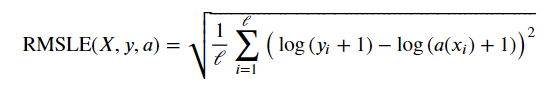

In [126]:
from math import log
### Your code is here
rmsle_1 = (((df['trip_duration']+1).apply(log) - (df['prediction_1']+1).apply(log))**2).mean()**0.5
rmsle_2 = (((df['trip_duration']+1).apply(log) - (df['prediction_2']+1).apply(log))**2).mean()**0.5

In [116]:
###Распечатайте значения для обоих моделей. Используйте эти значения для ответа на задание 8.

"""
RMSLE первой модели равно: 0.4944432017073192
RMSLE второй модели равно: 0.6552031340998238
"""

'\nRMSLE первой модели равно: 0.4944432017073192\nRMSLE второй модели равно: 0.6552031340998238\n'

In [117]:
print(f"RMSLE первой модели равно: {rmsle_1}")
print(f"RMSLE второй модели равно: {rmsle_2}")

RMSLE первой модели равно: 0.553758177459037
RMSLE второй модели равно: 1.5564340528341496


Посчитайте, для какого количества объектов первая модель сделала перепредсказания и недопредсказания

Аналогичный расчет проведите для первой модели и недопредсказания.

P.S. оставьте колонку с предсказанием такой, какой она оказалась после замены отрицательных значений

Счетчики перепредсказаний и недопредсказаний назовите *over_predicted_1* и *under_predicted_1*

In [121]:
df.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km,prediction_1,prediction_2
id,,,,,,,,
id2875421,1,2016-03-14 17:24:55,930.399753,0,455.0,1.500479,578.156451,355.270710
id2377394,0,2016-06-12 00:43:35,930.399753,0,663.0,1.807119,962.657188,674.295781
id3858529,1,2016-01-19 11:35:24,930.399753,0,2124.0,6.392080,2546.180515,2422.132431
id3504673,1,2016-04-06 19:32:31,930.399753,0,429.0,1.487155,737.926214,795.992362
id2181028,1,2016-03-26 13:30:55,930.399753,0,435.0,1.189925,666.070794,0.000000


In [122]:
### Your code is here
over_predicted_1 = sum(df['prediction_1'] > df['trip_duration'])
under_predicted_1 = sum(df['prediction_1'] < df['trip_duration'])

In [123]:
###Распечатайте значения для обоих моделей. Используйте эти значения для ответа на задание 9.
print(f"Предсказания первой модели оказались больше действительных в {over_predicted_1} случаях")
print(f"Предсказания первой модели оказались меньше действительных в {under_predicted_1} случаях")

Предсказания первой модели оказались больше действительных в 1456721 случаях
Предсказания первой модели оказались меньше действительных в 1923 случаях


Аналогично для второй модели


Счетчики перепредсказаний и недопредсказаний назовите *over_predicted_2* и *under_predicted_2*

In [124]:
### Your code is here
over_predicted_2 = sum(df['prediction_2'] > df['trip_duration'])
under_predicted_2 = sum(df['prediction_2'] < df['trip_duration'])

In [125]:
###Распечатайте значения для обоих моделей. Используйте эти значения для ответа на задание 10.
print(f"Предсказания второй модели оказались больше действительных в {over_predicted_2} случаях")
print(f"Предсказания второй модели оказались меньше действительных в {under_predicted_2} случаях")

Предсказания второй модели оказались больше действительных в 811778 случаях
Предсказания второй модели оказались меньше действительных в 646866 случаях


Сравните две модели заново. Согласуется ли полученный результат с подсчетом **RMSLE** ранее?